<a href="https://colab.research.google.com/github/ShailendraSSY/Neural-Network/blob/master/M2_AST_11_Naive_Bayes_Classifier___Linear_Regression_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 11: Naive Bayes Classifier & Linear Regression

## Learning Objectives

At the end of the experiment, you will be able to:

* understand the 20newsgroup dataset
* preprocess the text data
* understand the representation of text document using Bag of 
Words
* classify the Bag of Words represented text data with the Naive Bayes Classifier
* understand how to approach a Machine Learning problem
* understand how to decide which algorithm to use
* understand why we use Linear Regression 
* implement Linear Regresion using Normal Equation as well as scikit learn

## Dataset


In this experiment we use the 20 newsgroup dataset

### Description


This dataset is a collection of approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups, that is there are approximately one thousand documents taken from each of the following newsgroups. Below are the 20 newsgroups categories:

    alt.athesim
    comp.graphics   
    comp.os.ms-windows.misc
    comp.sys.ibm.pc.hardware
    comp.sys.mac.hardware
    comp.windows.x
    misc.forsale
    rec.autos
    rec.motorcycles
    rec.sport.baseball
    rec.sport.hockey
    sci.crypt
    sci.electronics
    sci.med
    sci.space
    soc.religion.christian
    talk.politics.guns
    talk.politics.mideast
    talk.politics.misc
    talk.religion.misc

The dataset consists **Usenet** posts--essentially an email sent by subscribers to that newsgroup. They typically contain quotes from previous posts as well as cross posts i.e. a few posts may be sent to more than once in a newsgroup.

Each newsgroup is stored in a subdirectory, with each post stored as a separate file.

Data source to this experiment : http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

## Domain Information
A newsgroup, despite the name, has nothing to do with news. It is what we would call today a mailing list or a discussion forum. Usenet is a distributed discussion system designed and developed in 1979 and deployed in 1980.  

Members joined newsgroups of their interest and made *posts*. Posts are very similar to email -- in later years, newsgroups became mailing lists and people posted via email.

Here the objecive is solving the "Text classification" problem. This is a broadly defined task which is common to many services and products. For example, gmail classifies an incoming mail into different sections such as Updates, Forums etc..


### Bag of Words (BoW)

* The Bag of Words is a collection of words to represent a document with word count and mostly disregarding the order in which they appear. Here, we look at the histogram of the words within the text, i.e. considering each word count as a feature.

* The bag-of-words is a simple way to understand the representation of documents and words. It makes use of the one-hot vector representation (which returns a sparse matrix), where it is used to distinguish each word in a vocabulary from every other word in the vocabulary. The vector consists of 0s in all cells with the exception of a single 1 in a cell used uniquely to identify the word and the document is represented as a sum of one-hot vectors of all the words in the document.

* It is a way of representing a text document. The frequency of occurrence of each word in the defined vocabulary is represented in a vector form (1 Dimensional array). These vectors (features) can be used for training machine learning algorithms.

### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2200023" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9910549998" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()
  
notebook= "M2_AST_11_Naive_Bayes_Classifier_&_Linear_Regression_C" #name of the notebook

def setup():
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/insurance.csv")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/DL_DS_NEWSGROUPS_PICKELFILE.pkl")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError 
    else: 
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError 
    else: 
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required Packages


In [4]:
import pickle
import re
import operator
import collections
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas  as pd 
import seaborn as sns

# Sklearn Libraries
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Loading the dataset

To know more details about the pickle refer to the following [link](https://colab.research.google.com/drive/1O1KGielUbjcRROG9YFHXgxb6iYNUT7R_?usp=sharing)


In [5]:
# Loading the dataset
dataset = pickle.load(open('DL_DS_NEWSGROUPS_PICKELFILE.pkl','rb'))
print(dataset.keys())

dict_keys(['talk.politics.mideast', 'rec.autos', 'comp.sys.mac.hardware', 'alt.atheism', 'rec.sport.baseball', 'comp.os.ms-windows.misc', 'rec.sport.hockey', 'sci.crypt', 'sci.med', 'talk.politics.misc', 'rec.motorcycles', 'comp.windows.x', 'comp.graphics', 'comp.sys.ibm.pc.hardware', 'sci.electronics', 'talk.politics.guns', 'sci.space', 'soc.religion.christian', 'misc.forsale', 'talk.religion.misc'])


To get a sense of our data, let us first start by counting the frequencies of the target (categories) classes in our news articles in the dataset.

In [6]:
# Print frequencies of dataset
print("Class : count")
print("--------------")
count = []
number_of_documents = 0
for key in dataset:
    print(key, ':', len(dataset[key]))
    count.append(len(dataset[key]))

Class : count
--------------
talk.politics.mideast : 940
rec.autos : 990
comp.sys.mac.hardware : 961
alt.atheism : 799
rec.sport.baseball : 994
comp.os.ms-windows.misc : 985
rec.sport.hockey : 999
sci.crypt : 991
sci.med : 990
talk.politics.misc : 775
rec.motorcycles : 994
comp.windows.x : 980
comp.graphics : 973
comp.sys.ibm.pc.hardware : 982
sci.electronics : 981
talk.politics.guns : 910
sci.space : 987
soc.religion.christian : 997
misc.forsale : 972
talk.religion.misc : 628


### Visualization of the Newsgroup dataset

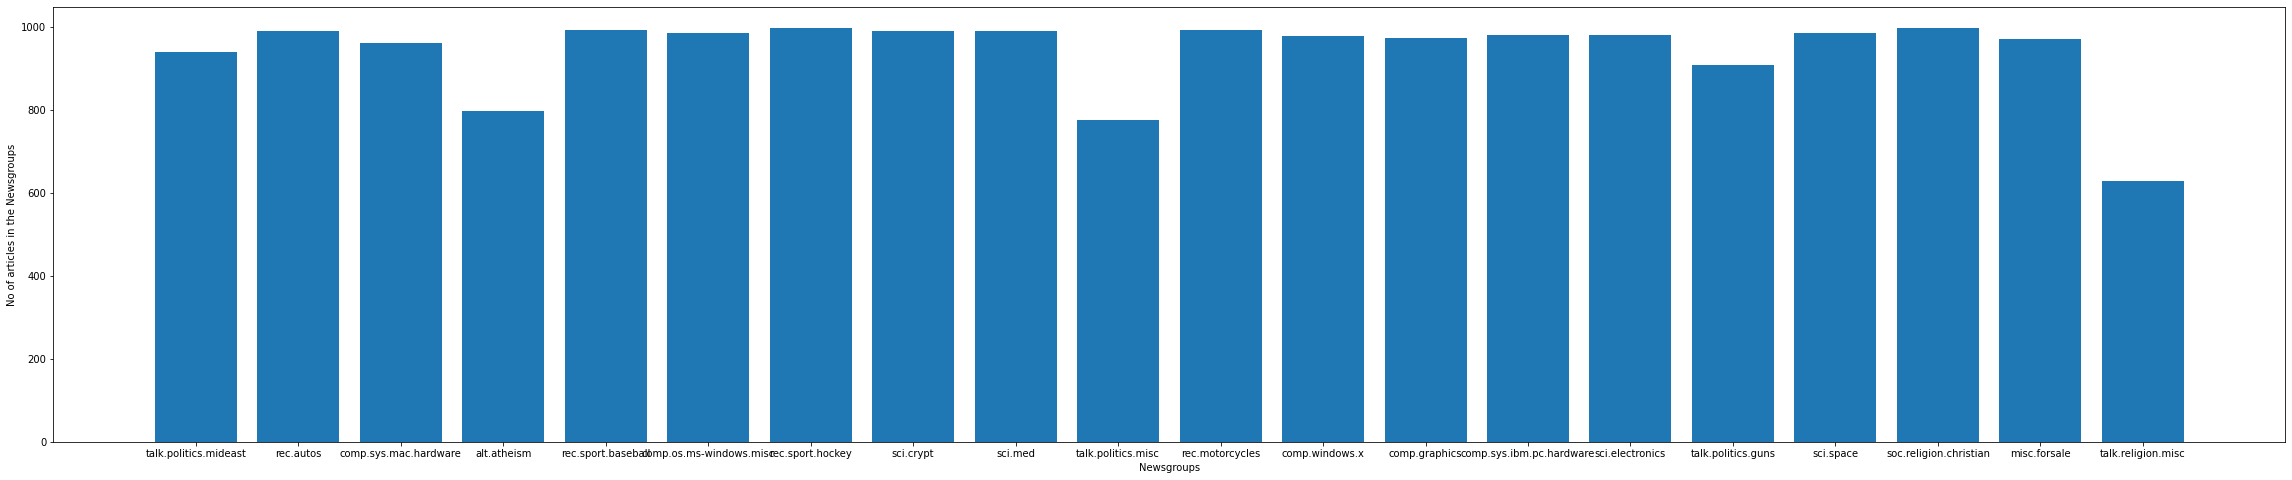

In [7]:
fig = plt.figure(figsize = (40, 8))
 
# Creating the bar plot of class vs frequencies
plt.bar(list(dataset.keys()), count);
plt.xlabel('Newsgroups')
plt.ylabel('No of articles in the Newsgroups');

In [8]:
# From the dataset select the class and the article number to be displayed
dataset['sci.med'][4]

['subject: re: cure for dry skin?\n',
 'from: habersch@husc8.harvard.edu (oren haber-schaim)\n',
 '\n',
 'jlecher@pbs.org writes:\n',
 '\n',
 '>in article <1rmn0c$83v@morrow.stanford.edu>, mou@nova1.stanford.edu (alex mou) writes:\n',
 '>> hi all,\n',
 '>> \n',
 '>> my skin is very dry in general. but the most serious part is located\n',
 '>> from knees down. the skin there looks like segmented. the segmentation\n',
 '>> actually happens beneath the skin. i would like to know if there is any\n',
 '>> cure for this.\n',
 '>> \n',
 '\n',
 '>as a matter of fact, i just saw a dermatologist the other day, and while i \n',
 ">was there, i asked him about dry skin. i'd been spending a small fortune\n",
 '>on various creams, lotions, and other dry skin treatments.\n',
 '>he said all i needed was a large jar of vaseline. soak in a lukewarm tub\n',
 '>of water for 10 minutes (only 10 minutes!) then massage in the vaseline,\n',
 '>to trap the moisture in. \n',
 '\n',
 'that is the standard advice

Next, let us split our dataset which consists of approx.1000 samples per class, into training and test sets. We use 950 samples from each class in the training set, and the remaining 50 in the test set. 

In [9]:
train_set = {}
test_set = {}
    
# Break dataset into 95-5 split for training and testing
n_train = 0
n_test = 0

split_ratio = 0.95

for k in dataset:
    split = int(split_ratio*len(dataset[k]))
    train_set[k] = dataset[k][0:split]
    test_set[k] = dataset[k][split:]
    n_train += len(train_set[k])
    n_test += len(test_set[k])

## 1. Bag-of-Words

Let us begin our journey into text classification with one of the simplest but most commonly used feature representations for text documents - Bag-of-Words.

As you might have realized, machine learning algorithms need good feature representations of different inputs.  Concretely, we would like to represent each news article $D$ in terms of a feature vector $V$, which can be used for classification. Feature vector $V$ is made up of the number of occurences of each word in the vocabulary.

Let us begin by counting the number of occurences of every word in the news documents in the training set.

### 1.1 Word frequency

Now let us try to count the frequencies of words and store it in a dictionary. By doing this we have the vocabulary built for the corpus (in this case 20 news groups)



In [10]:
def frequency_words(train_set): 
  # Initialize a dictionary to store frequencies of words.
  # Key:Value === Word:Count 
  frequency = defaultdict(int)
 
  # Loop through each newsgroup in the dataset
  for key in train_set:
      # Loop through each article in the dataset
      for f in train_set[key]:

          # For each article find all words which consist only of capital and lowercase characters and are between length of 2-9.
          # We ignore all special characters such as !.$ and words containing numbers
          words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', ' '.join(f))

          for word in words:
              frequency[word] += 1
  return frequency

Let us try to understand the kind of words that appear frequently, and those that occur rarely. 

In [11]:
# Call the frequency_words() function by passing the training set
frequency_of_words = frequency_words(train_set)

# 'frequency_of_words.items()' returns the list with all dictionary keys with values (words and it's frequencies)
# operator.itemgetter(1) method can be used to sort a dictionary by value (frequencies)
# 'reverse=True' is to sort the frequencies in descending order
sorted_words = sorted(frequency_of_words.items(), key=operator.itemgetter(1), reverse=True)

print("Top-10 most frequent words:")
for word in sorted_words[:10]:
    print(word)

print('----------------------------')
print("10 least frequent words:")
for word in sorted_words[-10:]:
    print(word)

Top-10 most frequent words:
('the', 226860)
('and', 90621)
('that', 62088)
('for', 43546)
('you', 42430)
('from', 35358)
('this', 31001)
('not', 28645)
('have', 28519)
('are', 28355)
----------------------------
10 least frequent words:
('apokteiuo', 1)
('odessy', 1)
('reedited', 1)
('stumps', 1)
('morsel', 1)
('roston', 1)
('nutball', 1)
('tillage', 1)
('honorably', 1)
('beecher', 1)


Next, we attempt to plot a histogram of the frequencies of various words in descending order. 


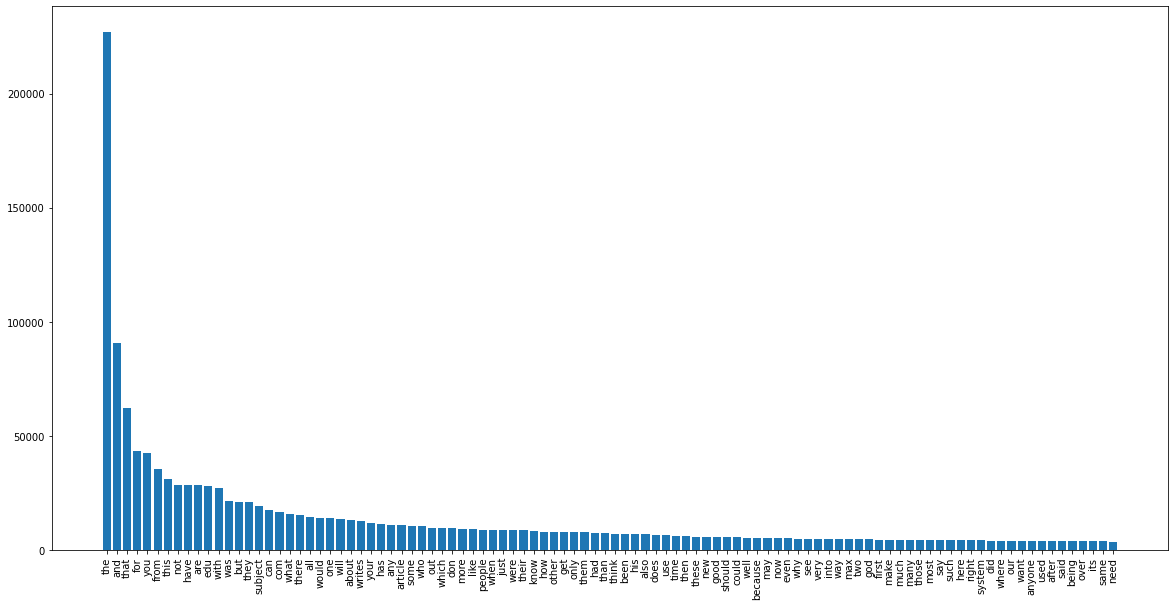

In [12]:
fig = plt.figure()
fig.set_size_inches(20,10)

# From the sorted words we try to plot the histogram for the first 100 words
plt.bar(range(len(sorted_words[:100])), [v for k, v in sorted_words[:100]] , align='center')
plt.xticks(range(len(sorted_words[:100])), [k for k, v in sorted_words[:100]])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

Please observe the above bar chart of word vs its frequency. Generally the stop words. are the words that appear on most of the documents and the words that are too rare come in this list. These words don't add much value in the classification task. So, we remove them to decrease the vocabulary.

### 1.2 Pre-processing to remove most frequent words

We can see that different words appear with different frequencies.

The most common words appear in almost all documents. Hence, for a classification task, having information about those word's frequencies does not matter much since they appear frequently in every type of document. To get a good feature representation, we eliminate them since they do not add too much value.

Additionally, notice how the least frequent words appear so rarely that they might not be useful either.

Let us pre-process our news articles now to remove the most frequent and least frequent words by thresholding their counts: 

In [13]:
def cleaning_vocabulary_words(list_of_grams):
  valid_words = defaultdict(int)

  print('Number of words before preprocessing:', len(list_of_grams))

  # Ignore the 25 most frequent words, and the words which appear less than 100 times
  ignore_most_frequent = 25
  freq_thresh = 100
  feature_number = 0
  for word, word_frequency in sorted_words[ignore_most_frequent:]:
    if word_frequency > freq_thresh:
        valid_words[word] = feature_number
        feature_number += 1

  print('Number of words after preprocessing:', len(valid_words))

  vector_size = len(valid_words)

  return valid_words, vector_size

In [14]:
valid_words, number_of_words = cleaning_vocabulary_words(sorted_words)

Number of words before preprocessing: 89599
Number of words after preprocessing: 4096


### 1.3 Bag-of-Words representation

The simplest way to represent a document $D$ as a vector $V$ would be to now count the relevant words in the document. 

For each document, make a vector of the count of each of the words in the vocabulary (excluding the words removed in the previous step - the "stopwords").

In [15]:
def convert_to_BoW(dataset, number_of_documents):
    bow_representation = np.zeros((number_of_documents, number_of_words))
    labels = np.zeros((number_of_documents, 1))
    
    i = 0
    for label, class_name in enumerate(dataset):
        
        # For each file
        for f in dataset[class_name]:
            
            # Read all text in file
            text = ' '.join(f).split(' ')
            
            # For each word in the article
            for word in text:
                # To check whether the words is present in the valid words
                if word in valid_words:
                    # For the given article if the word is present in the valid words we create a BOW representation
                    bow_representation[i, valid_words[word]] += 1
            
            # Label of the document
            labels[i] = label
            
            # Increment document counter
            i += 1
    
    return bow_representation, labels

# Convert the dataset into their bag of words representation by calling the 'convert_to_BoW()' function treating train and test separately
train_bow_set, train_bow_labels = convert_to_BoW(train_set, n_train)
test_bow_set, test_bow_labels = convert_to_BoW(test_set, n_test)

### 1.4 Document classification using Naive Bayes


#### What is scikit learn?

Scikit learn is a library used to perform machine learning in Python. Scikit learn is an open source machine learning library which is free software licensed and is reusable in various contexts, encouraging academic and commercial use. 

Scikit-learn  provides a range of supervised and unsupervised learning algorithms in Python. 

It provides efficient tools for data analysis, data pre-processing, model building, model evaluation, and much more. 


#### What are the standard methods present in classifier implementation?


* First we start with importing the necessary classifier and creating an instance for it.

* By using **fit()** we fit the classifier to the training data, which  is essentially the training part of the modeling process

* By using **predict()** for a classifier, we can classify the data (from a test set) using the predict method.

* By using **score()** returns the mean accuracy on the given test data and labels.

* By using **predict_proba** returns probability estimates for the test data

####  What is Naive bayes classifier? 

A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. It's a classifier in machine learning model, where every feature (words) is independent of each other, so we look at individual words in a sentence, instead of the entire sentence in order to predict the category of a given text data. As Naive Bayes is a probabilistic classifier, therefore will calculate the probability of each category using Bayes theorem, and the category with the highest probability will be the output. 

Since 'Naive Bayes' is based on the Bayes Theorem, which helps us compute the conditional probabilities of occurrence of two events based on the probabilities of occurrence of each individual event, encoding those probabilities is extremely useful.



#### Why MultinomialNB?

MultinomialNB classifier is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features used by the classifier are the frequency i.e. the number of times a given word appears in a document. The Probability of each word per class is calculated.



Refer to the following [link](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) for the MultinomailNB classifier from scikit learn



#### What is alpha in scikit learn implementation of MultinomailNB? 


**alpha** represents the Laplacian Smoothing parameter.


If we choose a value of alpha $\neq 0$ (not equal to 0), the probability will no longer be zero even if a word is not present in the training dataset.

#### Advantages of Laplacian Smoothing in Naive Bayes

The frequency-based probability might introduce zeros when multiplying the probabilities, leading to a failure in preserving the information contributed by the non-zero probabilities. Therefore, a smoothing approach, for example, the Laplace smoothing, must be adopted to counter this problem.

Laplace smoothing is a smoothing technique that helps tackle the problem of zero probability in the Naïve Bayes machine learning algorithm.

For Eg: By setting the smoothing parameter alpha (α) = 1, we add 1 to every probability, therefore the probability for each category, will never be zero.



In [16]:
# Create an instance for the MultinomialNB classifier
clf = MultinomialNB(alpha=0.1)

# Fit the model with the train data
clf.fit(train_bow_set, train_bow_labels)

# Get the prediction on the test set
predicted = clf.predict(test_bow_set)

# Calculate the accuracy score
accuracy_score(test_bow_labels, predicted)

0.7894736842105263

### 1.5 Model Evaluation



#### Classification Report : 

A Classification report is used to measure the quality of predictions from a classification algorithm. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below.

 * **true positive** The correct label of the given instance is positive, and the classifier also predicts it as a positive
 * **false positive** The correct label is negative, but the classifier incorrectly predicts it as positive
 * **true negative** The correct label is negative, and the classifier also predicts a negative
 * **false negative** The correct label is positive, but the classifier incorrectly predicts it as negative



* **Precision:** The precision is calculated as the ratio between the number of Positive samples correctly classified to the total number of samples classified as Positive (either correctly or incorrectly)

    Precision = $\mathbf{\frac{True \ Positive}{True \ Positive + False \ Positive}}$

* **Recall:** Recall tells us how many true positives (points labelled as positive) were recalled or found by our model.

   Recall = $\mathbf{\frac{True \ Positive}{True \ Positive + False \ Negative}}$

* **F1-score:** precision and recall can be combined into a single score that seeks to balance both concerns, called the F-score or the F-measure.
  
   F1-score = $ 2* \mathbf{\frac{Precision * Recall}{Precision + Recall}}$

* **Accuracy:** it is the ratio of the number of correct predictions to the total number of input samples.

<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/precision_and_recall.jpg" alt="Drawing" height="400" width="360"/>








For more details on precision and Recall refer to the following [link](https://medium.com/@klintcho/explaining-precision-and-recall-c770eb9c69e9)

For example of precision and Recall refer to the following [link](https://towardsdatascience.com/confusion-matrix-clearly-explained-fee63614dc7)

In [17]:
# Print the classificatin report
print(classification_report(test_bow_labels, predicted, target_names=dataset.keys()))

                          precision    recall  f1-score   support

   talk.politics.mideast       0.93      0.85      0.89        47
               rec.autos       0.76      0.88      0.81        50
   comp.sys.mac.hardware       0.77      0.82      0.79        49
             alt.atheism       0.71      0.85      0.77        40
      rec.sport.baseball       0.92      0.92      0.92        50
 comp.os.ms-windows.misc       0.67      0.76      0.71        50
        rec.sport.hockey       0.96      0.88      0.92        50
               sci.crypt       0.88      0.84      0.86        50
                 sci.med       0.86      0.74      0.80        50
      talk.politics.misc       0.76      0.67      0.71        39
         rec.motorcycles       0.77      0.80      0.78        50
          comp.windows.x       0.77      0.67      0.72        49
           comp.graphics       0.57      0.65      0.61        49
comp.sys.ibm.pc.hardware       0.71      0.68      0.69        50
         

#### Confusion Matrix:


* **Confusion matrix:**  is a table that is used to describe the performance of a classification model on a set of test data for which the true values are known. 




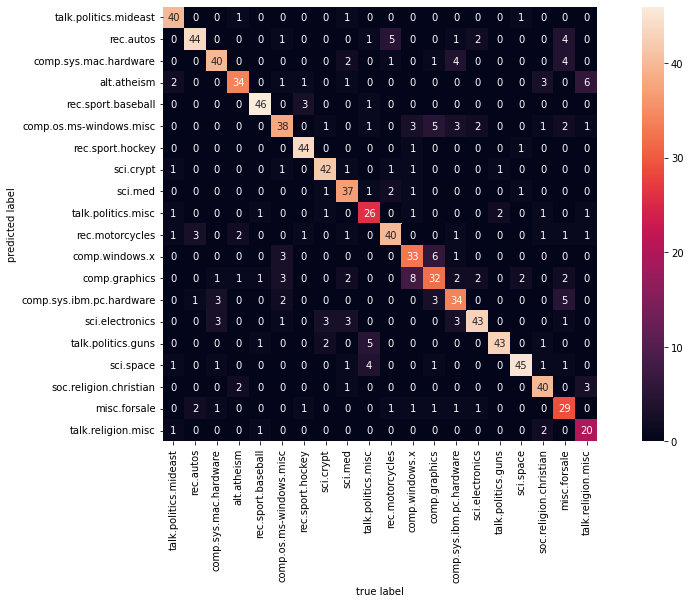

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(test_bow_labels, predicted)

plt.figure(figsize = (16,8))

# Visualizing the confusion matrix as a heatmap
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=dataset.keys(),
            yticklabels=dataset.keys())
plt.xlabel('true label')
plt.ylabel('predicted label');

A confusion matrix gives us an idea of how good is our model. It describes the performance of a classification model on a set of test data for which the
true values are known. Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

From the above confusion matrix we can interpret that the diagonal elements represent the total correct values predicted per class. The lighter the color, the greater the number as we can see from the color-bar on the side. So we would assume that — lighter colours on the diagonal elements and darker on all others mean our model is performing well and vice-versa.

For Eg. 44 documents have been correctly predicted as belonging to class 2 (rec.autos) out of 58 documents and the remaining are incorrectly classified


### Plotting alpha values vs F1-score

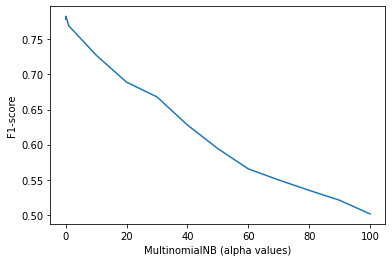

In [19]:
# Define the parameter values that should be searched for Multinomial Naive Bayes classifier
alphas = [0.001, 0.01, 0.1, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

f1_observed = []
for i in alphas:
    clf = MultinomialNB(alpha=i, fit_prior=False)
    clf.fit(train_bow_set, train_bow_labels)
    predicted = clf.predict(test_bow_set)
    f1_observed.append(f1_score(test_bow_labels, predicted, average='macro'))

plt.plot(alphas, f1_observed)
plt.xlabel('MultinomialNB (alpha values)')
plt.ylabel('F1-score')
plt.show();

## Problem Statement: Medical Insurance Expense Prediction

### Introduction
What is the importance of medical insurance cost prediction?

If we built such a system that can help to give an estimate of insurance cost based on some conditions of the patient such as age, gender, bmi, etc, it would help insurance companies as well as individuals to know how much they have to spend on their health insurance.

Here, the dataset provided to you contains attributes of a patient such as age, sex, bmi, number of children, region, smoking habit along with the corresponding medical insurance charges incured to them. 

You are expected to use this dataset and build a prediction model to help estimate the cost incured to the future patient given all the relevant details.

Following are the details of each feature/attribute of the given dataset.




### Loading the Insurance dataset

In [20]:
insurance_data = pd.read_csv('insurance.csv')
print('\nNumber of insurance beneficiaries: {} ; features per beneficiary: {}  '.format(insurance_data.shape[0],insurance_data.shape[1]))
print('')


Number of insurance beneficiaries: 1338 ; features per beneficiary: 7  



### Summary of the dataset

In [21]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB



1. Each attribute has a full of `1338 non-null entries`, hence the dataset has no missing values. In case, if any null values(missing values) exist, we generally replace them with mean, median, or mode.

2. The dataset has `4 real` and `3 categorical` attributes/features.

In [22]:
real_cols = insurance_data.select_dtypes(exclude=['object'])
cat_cols = insurance_data.select_dtypes(include=['object'])
print("The numeric columns are: \n{} \n\nThe non-numeric columns are: \n{}"
      .format(list(real_cols.columns),list(cat_cols.columns)))

The numeric columns are: 
['age', 'bmi', 'children', 'charges'] 

The non-numeric columns are: 
['sex', 'smoker', 'region']


When we look at the shape of dataset it returned $(1338,7)$. So there are  $m=1338$  training data and  $n=7$  features. Here, the target variable is charges and remaining six variables are age, sex, bmi, children, smoker, region are independent variable as shown earlier. There are multiple independent variable, so we need to fit Multiple linear regression. For this, the hypothesis function looks like

$h_{θ}(x_{i})=θ_{0}+θ_{1}age+θ_{2}sex+θ_{3}bmi+θ_{4}children+θ_{5}smoker+θ_{6}region$
 
This multiple linear regression equation for given dataset.

If $i=1$ then

$h_{θ}(x_{1})=θ_{0}+θ_{1}19+θ_{2}female+θ_{3}27.900+θ_{4}0+θ_{5}yes+θ_{6}southwest$

$y_{1}=16884.92400$

If $i=3$ then

$h_{θ}(x_{3})=θ_{0}+θ_{1}28+θ_{2}male+θ_{3}33.000+θ_{4}3+θ_{5}no+θ_{6}northwest$

$y_{3}=4449.46200$

$x_{1}=(x_{11}\hspace{0.1cm}x_{12}\hspace{0.1cm}x_{13}\hspace{0.1cm}x_{14}\hspace{0.1cm}x_{15}\hspace{0.1cm}x_{16})=(19 \hspace{0.5cm} female \hspace{0.5cm} 27.9001 \hspace{0.5cm} no \hspace{0.5cm} northwest)$

### Matrix Formulation

In general we can write above vector as

$x_{ij}=(x_{i1}x_{i2}...x_{in})$
 
Now, we combine all available individual vector into single input matrix of size  $(m,n)$  and denoted by  $X$  input matrix, which consist of all training examples,

$X = \begin{bmatrix}
    x_{11}       & x_{12} & x_{13} & \dots & x_{1n} \\
    x_{21}       & x_{22} & x_{23} & \dots & x_{2n} \\
    \vdots        & \vdots   & \vdots   & \vdots  & \vdots\\
    x_{m1}       & x_{m2} & x_{m3} & \dots & x_{mn}
\end{bmatrix}_{(m,n)}$

 $\hat X = \begin{bmatrix}
   1 & x_{11}       & x_{12} & x_{13} & \dots & x_{1n} \\
   1 & x_{21}       & x_{22} & x_{23} & \dots & x_{2n} \\
    \vdots        & \vdots   & \vdots   & \vdots  & \vdots\\
   1 & x_{m1}       & x_{m2} & x_{m3} & \dots & x_{mn}
\end{bmatrix}_{(m,n+1)}$

We represent parameter of function and dependent variable in vector form as

$\theta = \begin{bmatrix}
    \theta_{0}\\
    \theta_{1}\\
    \vdots    \\
    \theta_{j}  \\
    \vdots     \\
     \theta_{n}  \\
\end{bmatrix}_{(n+1,1)}$  $Y = \begin{bmatrix}
    y_{1}\\
    y_{2}\\
    \vdots    \\
    y_{i}  \\
    \vdots     \\
    y_{m}  \\
\end{bmatrix}_{(m,1)}$  

 
Here, we represent hypothesis function in vectorized form

$h_{θ}(X)=X_{θ} =  X \theta$
 


### Visualization for Charges vs BMI

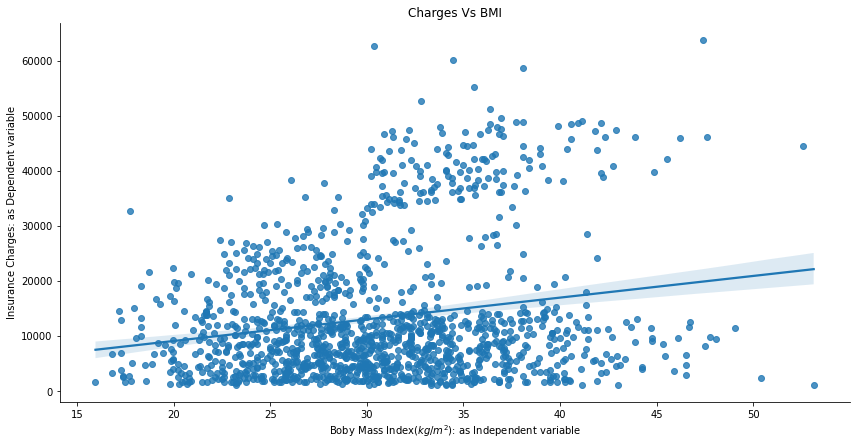

In [23]:
""" for our visualization purpose will fit line using seaborn library only for bmi as independent variable 
and charges as dependent variable"""

sns.lmplot(x='bmi',y='charges',data=insurance_data,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charges Vs BMI');

In above plot we fit regression line into the variables.



### Cost Function

A cost function measures how much error is there in the model by checking in terms of ability to estimate the relationship between  x  and  y . We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference of observed dependent variable in the given the dataset and those predicted by the hypothesis function.

$J(θ) = \frac{1}{m}\sum_{i=1}^{m} (\hat{y}_{i}−y_{i})^2$

$J(θ) = \frac{1}{m}\sum_{i=1}^{m} (h_{\theta}({x}_{i})−y_{i})^2$
  
To implement the linear regression, you should take training example add an extra column that is  $x_{0}$  feature, where  $x_{0}$=1 .  

$xo=(x_{i_{0}}x_{i_{1}}x_{i_{2}}...x_{m_{i}})$ ,

where  $x_{i_{0}}=0$  and input matrix will become as

$X = \begin{bmatrix}
    x_{10}       & x_{11} & x_{12} & \dots & x_{1n} \\
    x_{20}       & x_{21} & x_{22} & \dots & x_{2n} \\
    \vdots        & \vdots   & \vdots   & \vdots  & \vdots\\
    x_{m0}       & x_{m1} & x_{m2} & \dots & x_{mn}
\end{bmatrix}_{(m,n+1)}$ 

Each of the m input samples is similar to a column vector with n+1 rows,  $x_{0}$  being 1 for our convenience, that is  $x_{10},x_{20},x_{30}...x_{m0}=1$ . Now, we rewrite the ordinary least square cost function in matrix form as:

$J(θ)=\frac{1}{m}(X_{θ}−Y)^T(X_{θ}−Y)$
 
Let's look at the matrix multiplication concept. The multiplication of two matrix happens only if number of column of first matrix is equal to number of rows of second matrix. Here, input matrix  X  of size  $(m,n+1)$ , parameter of function is of size  $(n+1,1)$  and dependent variable vector of size  $(m,1)$ . The product of matrix  $X(m,n+1)θ(n+1,1)$  will return a vector of size  (m,1) , then product of $(X_{θ}−Y)^T_{(1,m)}(X_{θ}−Y)_{(m,1)}$  will return size of unit vector.



### Normal Equation

The normal equation is an analytical solution to the linear regression problem with a ordinary least square cost function. To minimize our cost function, take partial derivative of  $J(θ)$  with respect to  $θ$  and equate to  $0$. The derivative of function is nothing but checking that for a small change in input what would be the change in output of function.

$min_{θ_{0},θ_{1}...θ_{n}}J(θ_{0},θ_{1}..θ_{n})$
 
$\frac{∂J(θ_{j})}{∂ θ_{j}}=0$
 
where  j=0,1,2,....n 

Now we will apply partial derivative to our cost function,

$\frac{∂J(θ_{j})}{∂ θ_{j}}=\frac{\partial}{\partial \theta} (X_{\theta}-Y)^T(X_{\theta}-Y)$


 
We will remove 1/m  since we are going to equate the derivative to 0 and solve $J(θ)$. 

$J(θ)=(X_{θ}−Y)^T(X_{θ}−Y)$
 
=$(X_{θ}^T−Y^T)(X_{θ}−Y)$
 

=$(Xθ)^T−Y^T)(Xθ−Y)$
 
=$(Xθ)^T Xθ−Y^TXθ−(Xθ)^TY+Y^TY$
 
=$θ^T X^TXθ−2(Xθ)^T Y+Y^TY$

Here $\theta$ is unknown. To find where the above function has a minimum, we will derive by $\theta$ and equate it to 0. Also, we only use matrix notation to conveniently represent a system of linear formula. So, we derive by each component of the vector, and then combine the resulting derivatives into a vector again. 
 
$\frac{∂J(θ)}{∂θ}=\frac{∂}{∂θ}(θ^T X^TXθ−2θ^T X^TY+Y^TY)$
 
$0= 2 X^TXθ−2  X^Ty$
 
$ X^TXθ = X^TY$
 
$θ=(X^TX)^{(−1)} X^TY$
 
This is the normal equation for linear regression.

### Exploratory Data Analysis

Let us look into the description of the dataset.

In [24]:
insurance_data.describe(include="all").T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338,NaN,NaN,NaN,39.207,14.05,18,27,39,51,64
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338,NaN,NaN,NaN,30.6634,6.09819,15.96,26.2963,30.4,34.6938,53.13
children,1338,NaN,NaN,NaN,1.09492,1.20549,0,0,1,2,5
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338,NaN,NaN,NaN,13270.4,12110,1121.87,4740.29,9382.03,16639.9,63770.4


1. Compare means and standard devaiations for all the real columns to establish that the distributions are different. 

2. What is the problem if different continuous variables have different scales and magnitude?
  
  If there are different ranges for different continuous variables, then, the dataset will have some exceptional values very high or very low among the common values present in the dataset.   

3. What is the possible solution for handling different ranges and why?

  Normalizing the data is the solution. By Normalizing the data, the values can be stuffed in a specific range. Moreover, you will understand about Normalization in the later section. 

#### Check for missing values


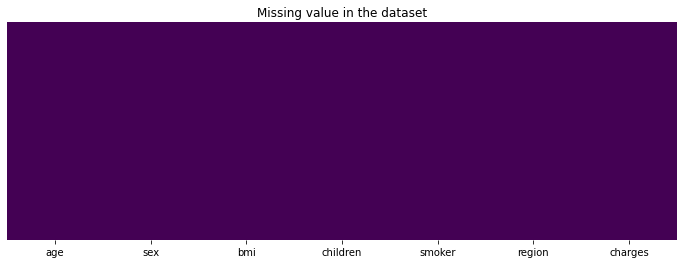

In [25]:
plt.figure(figsize=(12,4))
sns.heatmap(insurance_data.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

There is no missing values in the dataset.



#### Visualization of Correlation Matrix

From the below matrix, we observe that the highly correlated features has the correlation value close to 1. 

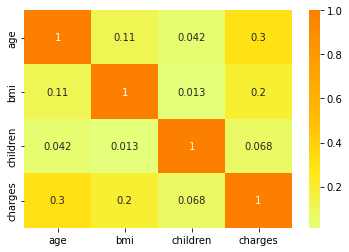

In [26]:
# correlation plot
corr = insurance_data.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

#### Visualization of Distribution of Insurance Charges

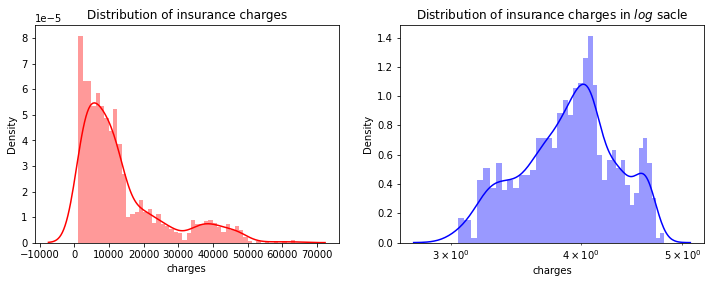

In [27]:
f = plt.figure(figsize=(12,4))

ax = f.add_subplot(121)
sns.distplot(insurance_data['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax = f.add_subplot(122)
sns.distplot(np.log10(insurance_data['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

If we look at the left plot the charges varies from 1120 to 63500, the plot is right skewed. In right plot we will apply natural log, then plot approximately tends to normal. For further analysis we will apply log on target variable charges.

#### Visualization for Charges vs Sex and Charges vs Smoker

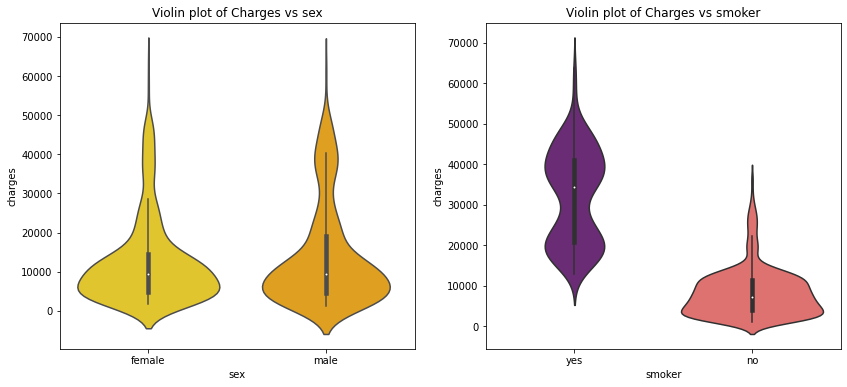

In [28]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=insurance_data,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=insurance_data,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

From left plot the insurance charge for male and female is approximatley in same range, it is average around 5000 bucks. In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks. For smoker the minimum insurance charge is itself 5000 bucks.

#### Visualization for Charges vs Children

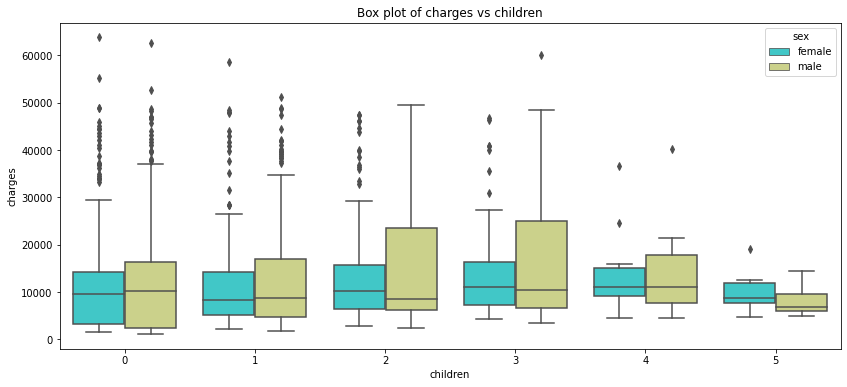

In [29]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=insurance_data,palette='rainbow')
plt.title('Box plot of charges vs children');

In [30]:
insurance_data.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


#### Visualization for Charges vs Region

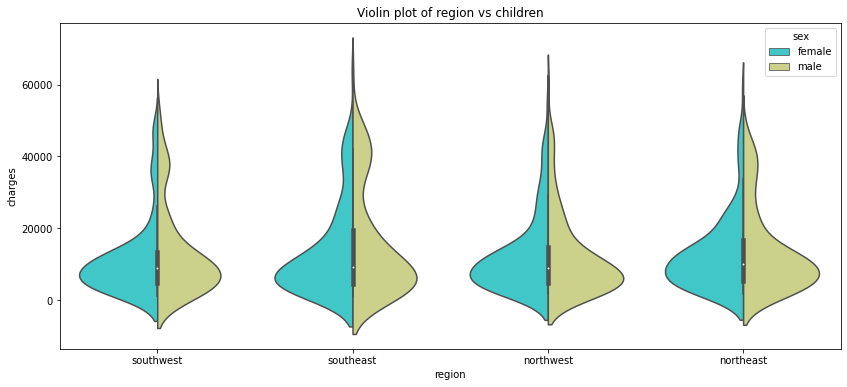

In [31]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=insurance_data,palette='rainbow',split=True)
plt.title('Violin plot of region vs children');

#### Visualization for Charges vs Age and Charges vs BMI

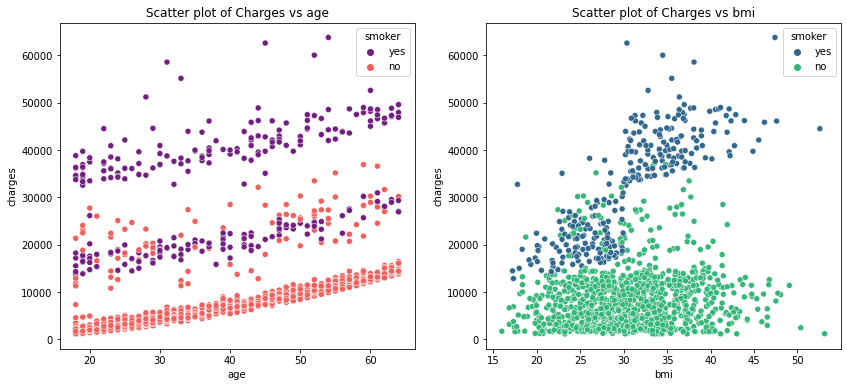

In [32]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=insurance_data,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=insurance_data,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

From left plot the minimum age of a person who is insured is 18 year. 

Body mass index (BMI) is a measure of body fat based on height and weight of a person. Here, the minimum bmi is 16 $kg/m^2$  and maximum upto 54 $kg/m^2$

### Data Preprocessing

#### Encoding the categorical data

Machine learning algorithms cannot work with categorical data directly. So,categorical data must be converted to number. We do the conversion in three ways:

1. Label Encoding

2. One hot encoding

3. Dummy variable trap

`Label encoding` refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

A `One hot encoding` is a representation of categorical variable as binary vectors. It allows the representation of categorical data to be more expressive. This first requires that the categorical values should be mapped to integer values, that is label encoding is performed. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with 1.

The Dummy variable trap is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables are highly correlated. In simple terms, one variable can be predicted from the others.

By using pandas `get_dummies` function we can do all above three step in line of code. We will use this fuction to get dummy variable for sex, children,smoker, and region. By setting drop_first =True, function will remove dummy variable trap by droping original variable. To know more about pandas get_dummies, click [here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). 


In [33]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
insurance_data_encode = pd.get_dummies(data = insurance_data, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

In [34]:
# Lets verify the dummy variable process
print('Columns in original data frame:\n',insurance_data.columns.values)
print('\nNumber of rows and columns in the dataset:',insurance_data.shape)
print('\nColumns in data frame after encoding dummy variable:\n',insurance_data_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',insurance_data_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


### Normalizing the data
Earlier we have observed that the ranges of different continuous variables are different. This is actually problematic. Therefore, we perform normalization for continuous variable.
  
The goal of normalization is to change the values of numeric columns in the dataset to a common scale without distorting differences in the ranges of values. We normalize the data to bring all the variables to the same range.
For this we can use `MinMaxScaler`. It scales and translates each feature individually such that it is in the given range on the training set, e.g. between `[0,1]` or else in the range `[-1, 1]` if there are negative values in the dataset. To learn more about MinMaxScaler click [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#:~:text=Transform%20features%20by%20scaling%20each,e.g.%20between%20zero%20and%20one.).



In [35]:
# Normalization
scaler = MinMaxScaler()

insurance_data_encode[["charges"]] = scaler.fit_transform(insurance_data_encode[["charges"]])

insurance_data_encode.head()

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,0.251611,0,0,0,0,0,0,1,0,0,1
1,18,33.770,0.009636,1,1,0,0,0,0,0,0,1,0
2,28,33.000,0.053115,1,0,0,1,0,0,0,0,1,0
3,33,22.705,0.333010,1,0,0,0,0,0,0,1,0,0
4,32,28.880,0.043816,1,0,0,0,0,0,0,1,0,0


In [36]:
# Checking the inverse transform to cross verify the values
scaler.inverse_transform(insurance_data_encode[['charges']])

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

### Splitting the dataset into train and test sets

In [37]:
X = insurance_data_encode.drop('charges',axis=1) # Independent feature
y = insurance_data_encode['charges'] # Dependent features

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [38]:
# Print first five rows from the data
X_test.head()

,age,bmi,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
918,61,28.200,0,0,0,0,0,0,0,0,0,1
755,31,27.645,1,0,1,0,0,0,0,0,0,0
207,35,27.740,1,0,1,0,0,0,1,0,0,0
520,50,27.360,0,0,0,0,0,0,0,0,0,0
695,26,40.185,0,0,0,0,0,0,0,1,0,0


### Model building

#### Implementing Linear Regression using Normal Equation

In this step, we will build model using our linear regression equation  $ θ=(X^TX)^{−1}X^Ty$ . In first step we need to add a feature $x_{0}=1$  to our original data set.

In [39]:
# Step 1: add x0 = 1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: Building the model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [40]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

#### Implementing Linear Regression using Scikit learn

1. Create an object of Linear Regression function
  
  *lr = LinearRegression()*

2. Fit the training data(features, dependent variable) using the `fit` method from sklearn.linear_model

  *fit(X_train, y_train)*

3. `Predict` the results using the test data that serves as unknown features to the linear regression model.

  *y_pred = lr.predict(X_test)*

4. Find the `Root Mean Square Error` i.e. the difference between the predicted value and the test set value.

  *rmse(y_test,y_pred)*

5. Finally, find the `R2 Score` for y_test and y_pred that depicts the accuracy score of the model built.

  *r2_score(y_test,y_pred)*

If you want to learn more about sklearn Linear Regression, click 
[here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [41]:
# Scikit Learn module
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is not required here as sklearn will take care of it.

# Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df.head()

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-0.205285,-0.205285
1,theta_1,age,0.003931,0.003931
2,theta_2,bmi,0.005555,0.005555
3,theta_3,OHE_male,-0.002042,-0.002042
4,theta_4,OHE_1,0.005137,0.005137


The parameter obtained from both the model are same. So, we succefully built our model using normal equation and verified using sklearn linear regression module. Let's move ahead with the next step of prediction and model evaluation.

### Model evaluation using Normal Equation


We will predict value for target variable by using our model parameter for test dataset. Then, compare the predicted value with actual value in test set. We compute Mean Square Error using formula
$J(θ)=\frac{1}{m} \sum_{i=1}^{m} (\hat{y}_{i}−y_{i})^2$
 
$R^2$  is statistical measure of how close data are to the fitted regression line.  $R^2$  is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.

$R^2$ = 1−$\frac{SSE}{SST}$
 
SSE = Sum of Square Error

SST = Sum of Square Total

$SSE = \sum_{i=1}^{m} (\hat{y}_{i}−y_{i})^2$

$SST = \sum_{i=1}^{m} (y_{i}−\bar{y}_{i})^2$

 
Here  $\hat{y}$  is predicted value and  $\bar{y}$  is mean value of  y

In [42]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

# Evaluation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  0.008956304682331847
R square obtain for normal equation method is : 0.7305284299807452


### Model Evaluation using sklearn module

If you want to know more about $R^2$ score, click 
[here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

If you want to know more about Mean Square Error, click 
[here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)




In [43]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluation: MSE
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  0.00895630468233185
R square obtain for scikit learn library is : 0.7305284299807451


Hence, we have successfully built and evaluated our Linear Regression model with the equation as well as the sklearn library. In both cases, we get the Mean Square Error as 0.00895630468233185 and the R square as 0.7305284299807451.

The low value for MSE denotes that our model has least error values. The R square value denotes the accuracy of the model. As the accuracy of the model increases, the R square value reaches close to 1.

### Please answer the questions below to complete the experiment:




In [44]:
#@title Q.1. What is incorrect regarding the Naive Bayes?
Answer1 = "" #@param ["","features are equally important", "features are statistically dependent of one another given the class value","features are statistically independent of one another given the class value","features can be nominal or numeric"]


In [45]:
#@title Q.2. The values of x and their corresponding values of y, (x, y) are as follows: (0, 2), (1, 3), (2, 4), (3, 5), (4, 6). Find the least square regression line y = a x + b for the given values and estimate the value of y when x = 12.
Answer2 = "" #@param ["","11", "13","15.2","17"]


In [46]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [47]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [48]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [49]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [50]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [51]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Please answer Question 1
